In [90]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [91]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [92]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [93]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [94]:
data_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [95]:
data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [96]:
data_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [97]:
data_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [98]:
data_test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [99]:
def get_combined_data():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    targets = train.Loan_Status
    train.drop('Loan_Status', 1, inplace=True)
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'Loan_ID'], inplace=True, axis=1)
    return combined

In [100]:
combined = get_combined_data()
combined.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [101]:
def impute_gender():
    global combined
    combined['Gender'].fillna('Male', inplace=True)

In [102]:
def impute_martial_status():
    global combined
    combined['Married'].fillna('Yes', inplace=True)

In [103]:
def impute_employment():
    global combined
    combined['Self_Employed'].fillna('No', inplace=True)


In [104]:
def impute_loan_amount():
    global combined
    combined['LoanAmount'].fillna(combined['LoanAmount'].median(), inplace=True)

In [105]:
def impute_credit_history():
    global combined
    combined['Credit_History'].fillna(2, inplace=True)

In [106]:
combined['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [107]:
impute_gender()

In [108]:
impute_martial_status()
impute_employment()
impute_loan_amount()
impute_credit_history()

In [109]:
combined.isnull().sum()

Gender                0
Married               0
Dependents           25
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [110]:
def process_gender():
    global combined
    combined['Gender'] = combined['Gender'].map({'Male':1,'Female':0})

In [111]:
def process_martial_status():
    global combined
    combined['Married'] = combined['Married'].map({'Yes':1,'No':0})

In [112]:
def process_dependents():
    global combined
    combined['Singleton'] = combined['Dependents'].map(lambda d: 1 if d=='1' else 0)
    combined['Small_Family'] = combined['Dependents'].map(lambda d: 1 if d=='2' else 0)
    combined['Large_Family'] = combined['Dependents'].map(lambda d: 1 if d=='3+' else 0)
    combined.drop(['Dependents'], axis=1, inplace=True)

In [113]:
def process_education():
    global combined
    combined['Education'] = combined['Education'].map({'Graduate':1,'Not Graduate':0})

In [114]:
def process_employment():
    global combined
    combined['Self_Employed'] = combined['Self_Employed'].map({'Yes':1,'No':0})

In [115]:
def process_income():
    global combined
    combined['Total_Income'] = combined['ApplicantIncome'] + combined['CoapplicantIncome']
    combined.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

In [116]:
def process_loan_amount():
    global combined
    combined['Debt_Income_Ratio'] = combined['Total_Income'] / combined['LoanAmount']

In [117]:
combined['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [118]:
approved_term = data_train[data_train['Loan_Status']=='Y']['Loan_Amount_Term'].value_counts()
unapproved_term = data_train[data_train['Loan_Status']=='N']['Loan_Amount_Term'].value_counts()
df = pd.DataFrame([approved_term,unapproved_term])
df.index = ['Approved','Unapproved']

In [119]:
def process_loan_term():
    global combined
    combined['Very_Short_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
    combined['Short_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
    combined['Long_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
    combined['Very_Long_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)
    combined.drop('Loan_Amount_Term', axis=1, inplace=True)

In [120]:
def process_credit_history():
    global combined
    combined['Credit_History_Bad'] = combined['Credit_History'].map(lambda c: 1 if c==0 else 0)
    combined['Credit_History_Good'] = combined['Credit_History'].map(lambda c: 1 if c==1 else 0)
    combined['Credit_History_Unknown'] = combined['Credit_History'].map(lambda c: 1 if c==2 else 0)
    combined.drop('Credit_History', axis=1, inplace=True)

In [121]:
def process_property():
    global combined
    property_dummies = pd.get_dummies(combined['Property_Area'], prefix='Property')
    combined = pd.concat([combined, property_dummies], axis=1)
    combined.drop('Property_Area', axis=1, inplace=True)

In [122]:
process_gender()
process_martial_status()
process_dependents()
process_education()
process_employment()
process_income()
process_loan_amount()
process_loan_term()
process_credit_history()
process_property()

In [123]:
def feature_scaling(df):
    df -= df.min()
    df /= df.max()
    return df

In [124]:
combined['LoanAmount'] = feature_scaling(combined['LoanAmount'])
combined['Total_Income'] = feature_scaling(combined['Total_Income'])
combined['Debt_Income_Ratio'] = feature_scaling(combined['Debt_Income_Ratio'])

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [126]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [127]:
def recover_train_test_target():
    global combined, data_train
    targets = data_train['Loan_Status'].map({'Y':1,'N':0})
    train = combined.head(614)
    test = combined.iloc[614:]
    return train, test, targets

In [128]:
train, test, targets = recover_train_test_target()

In [129]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [130]:
features = pd.DataFrame()
features['Feature'] = train.columns
features['Importance'] = clf.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

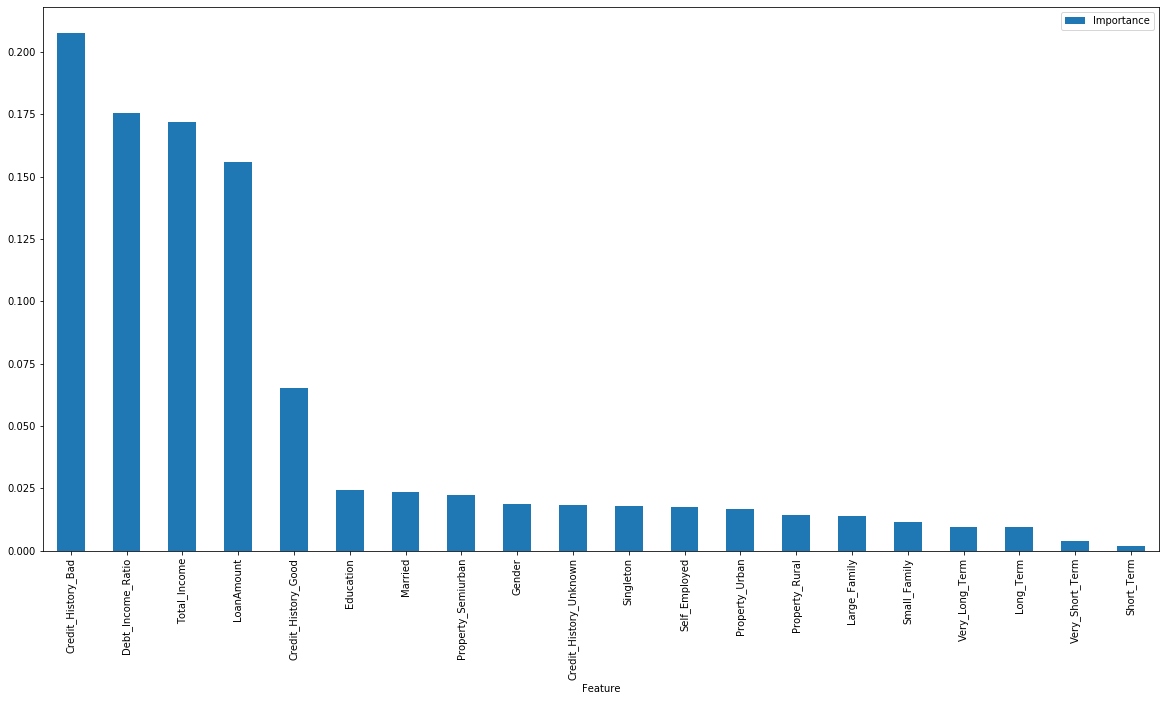

In [131]:
features.plot(kind='bar', figsize=(20, 10))

In [132]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(614, 5)

In [133]:
test_reduced = model.transform(test)
test_reduced.shape

(367, 5)

In [134]:
parameters = {'bootstrap': False,
              'min_samples_leaf': 3,
              'n_estimators': 50,
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6}

model = RandomForestClassifier(**parameters)
model.fit(train, targets)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=6, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [135]:
compute_score(model, train, targets, scoring='accuracy')

0.8030142781597039

In [148]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
temp = pd.read_csv('test.csv')
df_output['Loan_ID'] = temp['Loan_ID']
df_output['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(output)
df_output[['Loan_ID','Loan_Status']].to_csv('output.csv',index=False)

In [149]:
df_output[0:25]

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [150]:
from tkinter.messagebox import showinfo
from tkinter import *

In [151]:
status = df_output[df_output["Loan_ID"]=="LP001022"] ["Loan_Status"]

In [152]:
class Loans:
    def __init__(self, master):
        self.master = master
        master.title("Loan Approval")
        self.label = Label(self.master, text = "Enter Loan ID (From test.csv)")
        self.label.grid(row = 0,column = 0)  
        self.dateEnt = Entry(self.master)
        self.dateEnt.grid(row = 0, column = 1)
        self.button = Button(self.master, text = 'Enter', command =  self.press)
        self.button.grid(row = 1,column = 0, columnspan = 2)
    def press(self):
        id = self.dateEnt.get()
        isIn = (df_output["Loan_ID"]==id).any()
        if(isIn):
            if(df_output[df_output["Loan_ID"]==id]["Loan_Status"].iat[0] == "Y"):
                showinfo(message = "Your Loan was Approved!")
            if(df_output[df_output["Loan_ID"]==id]["Loan_Status"].iat[0] == "N"):
                showinfo(message = "Your Loan was Decline.")
        else: 
            showinfo(message = "Loan ID is not valid enter a valid Loan ID.")

In [143]:
root = Tk()
interface = Loans(root)
root.mainloop()